In [1]:
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

In [2]:
def show(img):
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap="gray")

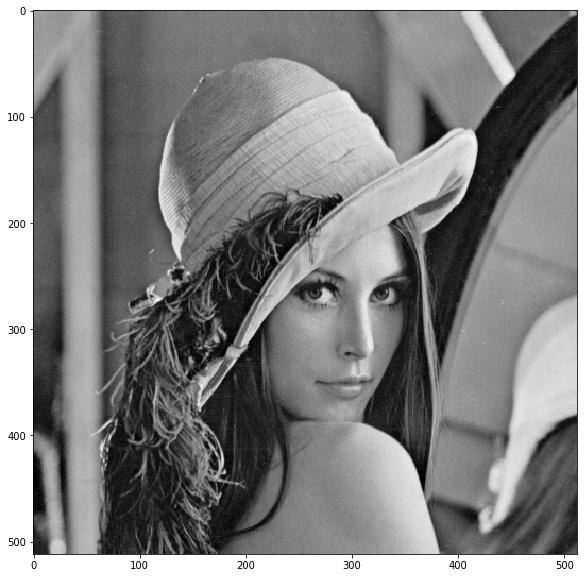

In [3]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
Y = Y.astype(np.float32)
show(Y)

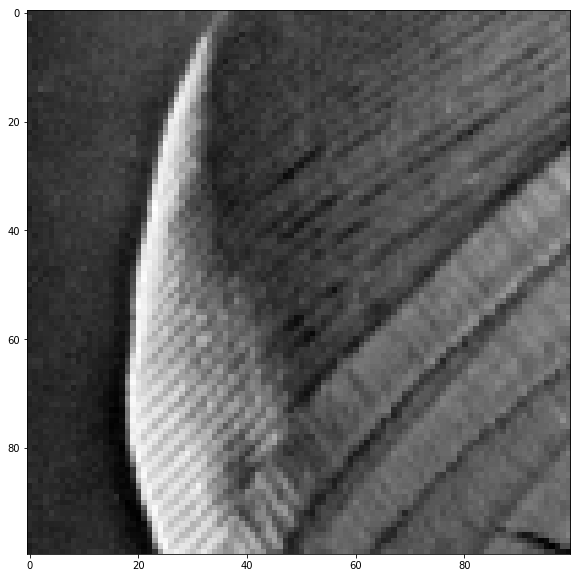

In [4]:
show(Y[100:200, 100:200])

In [5]:
print(Y[100:200, 100:200])

[[102. 102. 103. ... 130. 132. 140.]
 [112. 101. 102. ... 132. 144. 136.]
 [ 97.  99. 104. ... 147. 143. 137.]
 ...
 [ 99. 103.  99. ... 128. 139. 140.]
 [ 92.  97. 101. ...  88. 120. 121.]
 [ 95. 100.  96. ...  87.  85.  80.]]


In [6]:
Y.max()

245.0

In [7]:
Y.min()

25.0

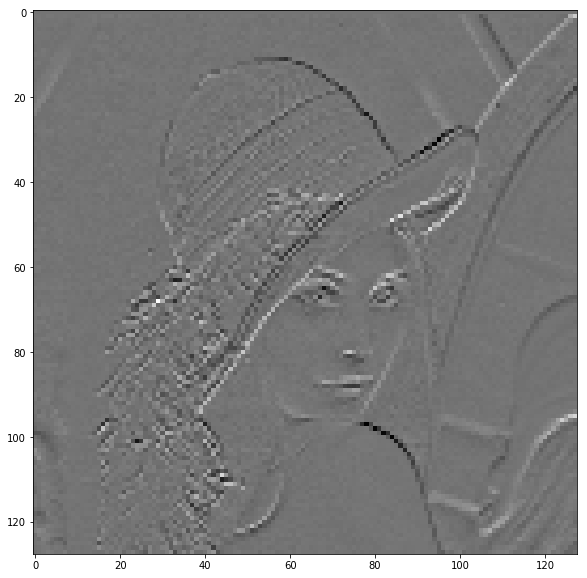

In [19]:
# Calculamos la DWT de la imagen original
wavelet = 'rbio1.1'
L, H = pywt.dwt2(Y, wavelet, 'per')
L2, H2 = pywt.dwt2(L, wavelet, 'per')
plt.figure(figsize = (10,10))
plt.imshow(H2[0], cmap="gray")

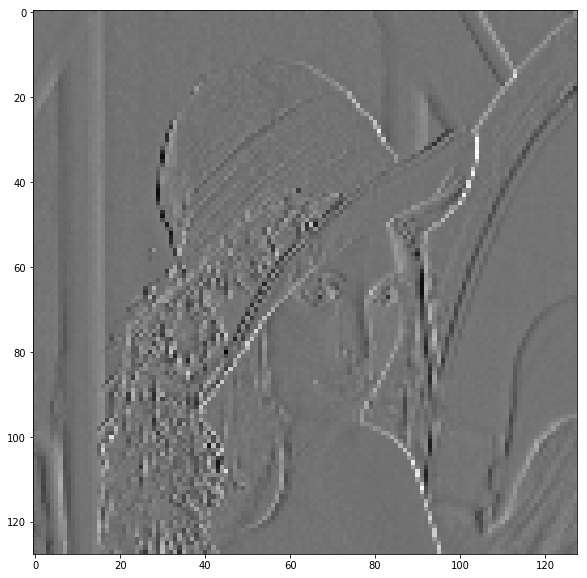

In [20]:
plt.figure(figsize = (10,10))
plt.imshow(H2[1], cmap="gray")

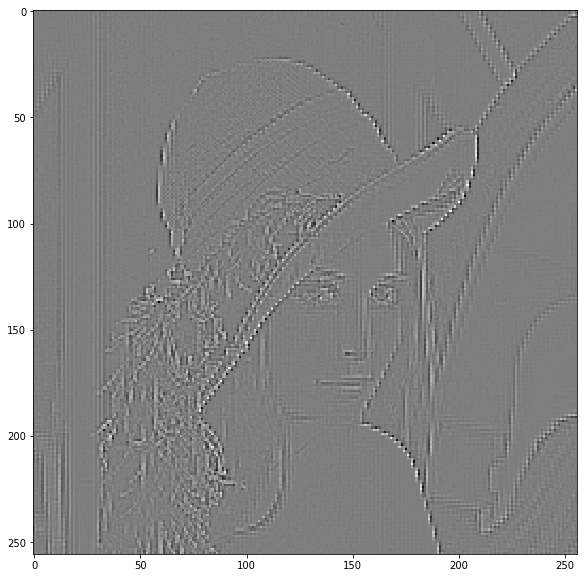

In [21]:
# Interpolamos H2
zero = np.zeros((L2.shape[0], L2.shape[1]))
_H2_ = pywt.idwt2((zero, H2), wavelet, 'per')
plt.figure(figsize = (10,10))
plt.imshow(_H2_, cmap="gray")

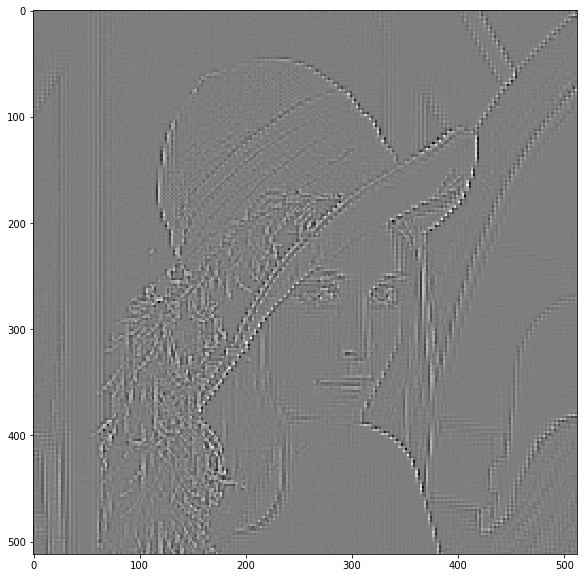

In [24]:
# Interpolamos _H2_
zero = np.zeros((L.shape[0], L.shape[1]))
__H2__ = pywt.idwt2((_H2_, (zero, zero, zero)), wavelet, 'per')
plt.figure(figsize = (10,10))
plt.imshow(__H2__, cmap="gray")

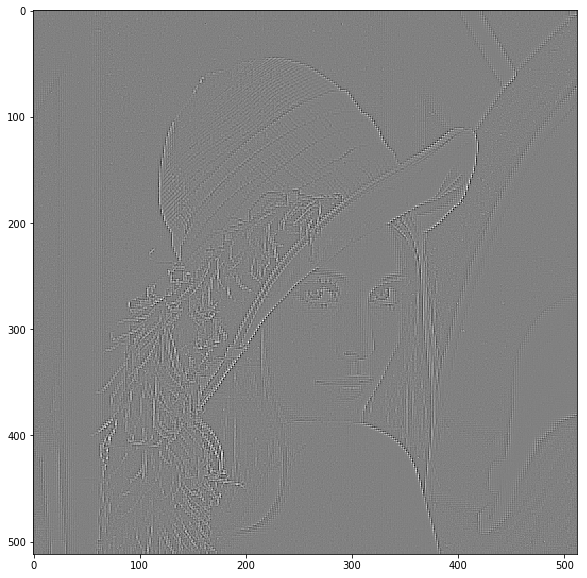

In [26]:
# Objective
L, H = pywt.dwt2(Y, wavelet, 'per')
zero = np.zeros((L.shape[0], L.shape[1]))
_H_ = pywt.idwt2((zero, H), wavelet, 'per')
plt.figure(figsize = (10,10))
plt.imshow(_H_, cmap="gray")